### 1. data preprocessing preprocessed the data frames from Gorilla Similarity task
### 2. within_category_similarity_distance use the preprocessed data frame and find the average rating within category
### 3. trialBased_SDperformance find the unique sequence and their percentage correctness (choose only absent block with if statement)
### 4. plot_relationship: combined rating and correctness plot relationsip

### Import Library

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from scipy.stats import pearsonr, t
import seaborn as sns

In [16]:
#Everyday/Complex Tone: Function to find sequetial distances
def calculate_distances(sequence, distance_data):
    # Split the sequence string into a list and remove any leading/trailing spaces from each element
    sequence_list = [item.strip() for item in sequence.split(',')]

    # Check if the sequence is too short
    if len(sequence_list) < 2:
        return "Sequence too short"

    total_distance = 0
    pair_count = 0

    # Iterate over pairs in the sequence
    for i in range(len(sequence_list) - 1):
        note_a = sequence_list[i]
        note_b = sequence_list[i + 1]

        # Search for distance data in both AB and BA order
        ab_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_a}.wav") & (distance_data['Spreadsheet: B'] == f"{note_b}.wav")]
        ba_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_b}.wav") & (distance_data['Spreadsheet: B'] == f"{note_a}.wav")]

        # Initialize variable to store distance
        distance = None

        # Check if AB or BA order distance is available
        if not ab_row.empty:
            distance = ab_row['Similarity_Distance'].iloc[0]
        elif not ba_row.empty:
            distance = ba_row['Similarity_Distance'].iloc[0]

        # Add the distance to the total if available
        if distance is not None:
            total_distance += distance
            pair_count += 1

    # Calculate the average distance
    if pair_count == 3:
        average_distance = total_distance / pair_count
        return average_distance
    else:
        return "N/A"


# Cat Meows ONlY; Function to find mean and min distances
def calculate_distances2(sequence, distance_data):
    # Split the sequence string into a list and remove any leading/trailing spaces from each element
    sequence_list = [item.strip().split('_', 1)[0] for item in sequence.split(',')]

    # Check if the sequence is too short
    if len(sequence_list) < 2:
        return "Sequence too short"

    total_distance = 0
    pair_count = 0

    # Iterate over pairs in the sequence
    for i in range(len(sequence_list) - 1):
        note_a = sequence_list[i]
        note_b = sequence_list[i + 1]

        # Search for distance data in both AB and BA order
        ab_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_a}_300ms.wav") & (distance_data['Spreadsheet: B'] == f"{note_b}_300ms.wav")]
        ba_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note_b}_300ms.wav") & (distance_data['Spreadsheet: B'] == f"{note_a}_300ms.wav")]

        # Initialize variable to store distance
        distance = None

        # Check if AB or BA order distance is available
        if not ab_row.empty:
            distance = ab_row['Similarity_Distance'].iloc[0]
        elif not ba_row.empty:
            distance = ba_row['Similarity_Distance'].iloc[0]

        # Add the distance to the total if available
        if distance is not None:
            total_distance += distance
            pair_count += 1

    # Calculate the average distance
    if pair_count == 3:
        average_distance = total_distance / pair_count
        return average_distance
    else:
        return "N/A"


def plot_distances1(filtered_df_everyday, filtered_df_complexTone):
    # Plot for Distance
    plt.scatter(filtered_df_everyday['Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone['Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances2(filtered_df_cat, filtered_df_complexTone):
    # Plot for Distance
    plt.scatter(filtered_df_cat['Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone['Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances_combined(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Plot for Distance
    plt.scatter(filtered_df_everyday['Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone1['Distance'], filtered_df_complexTone1['Correctness'], color='lightcoral', label='ComplexTone1')
    plt.scatter(filtered_df_cat['Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone2['Distance'], filtered_df_complexTone2['Correctness'], color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Plot for Distance
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_distances_2x2_subplots(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    plt.figure(figsize=(12, 12))

    # Subplot for ComplexTone1
    plt.subplot(2, 2, 1)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('ComplexTone1: Correctness vs. Distance')
    plt.legend()

    # Subplot for Everyday
    plt.subplot(2, 2, 2)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Everyday: Correctness vs. Distance')
    plt.legend()

    # Subplot for Cat
    plt.subplot(2, 2, 3)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Cat: Correctness vs. Distance')
    plt.legend()

    # Subplot for ComplexTone2
    plt.subplot(2, 2, 4)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('ComplexTone2: Correctness vs. Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def modified_plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Combine all dataframes for overall regression
    combined_df = pd.concat([filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2])
    
    plt.figure(figsize=(8, 8))

    # Plotting individual datasets with scatter and regression lines without confidence bands
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday', ci=None)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1', ci=None)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat', ci=None)
    sns.regplot(x='Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2', ci=None)

    # Plotting the combined regression line with a confidence band
    #sns.regplot(x='Distance', y='Correctness', data=combined_df, color='black', scatter=False, ci=95, line_kws={"color": "black"})

    plt.xlim([0, 5.5])
    plt.ylim([0, 1.1])
    plt.xlabel('Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Distance')
    #plt.legend()

    plt.tight_layout()
    save_path = os.path.join('/Users/willmacbookair/Downloads/Poster plot', "same_relationship.svg")
    # save the plot
    plt.savefig(save_path, format='svg')
    plt.show()

def calculate_and_print_correlation(df, distance_type):
    # Extract category from dataframe variable name
    category = df.name.split('_')[-1]  # Assuming the df has a 'name' attribute set

    # Calculate Pearson correlation
    corr, _ = pearsonr(df[distance_type], df['Correctness'])
    
    # Calculate t-value and p-value
    n = len(df) 
    t_value = corr * np.sqrt((n - 2) / (1 - corr**2))
    df_degrees = n - 2
    p_value = 2 * (1 - t.cdf(np.abs(t_value), df_degrees))

    # Print results
    print(f"r ({category} - {distance_type}): {corr:.3f}, t-value: {t_value:.3f}, p-value: {p_value:.3f}, dof: {df_degrees}")


### Plot the relation sequence correctness and similarity distance 

#### Experiment 2a everyday sound & complex tones

In [17]:
# Everyday Sound
# distance metric
distanceED= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_everydaySound.csv"
# everyday sound
everydayCorrectness = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9.5 Similarity in SD task - Same/Everyday_CompexTone_result/correctness_other.csv"

# Reading the CSV files
distance_df = pd.read_csv(distanceED)
correctness_df = pd.read_csv(everydayCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    #switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances(sequence_names, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        #'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_everyday = pd.DataFrame(results)
print(results_df_everyday)
# Filter out the rows where distance is -1
filtered_df_everyday = results_df_everyday[(results_df_everyday['Distance'] != -1)]
print(filtered_df_everyday)



                                             Sequence  Correctness  Distance
0            baby_3ms, sheep_3ms, snore_3ms, frog_3ms        0.675  2.439815
1     baby_3ms, snore_3ms, brush_teeth_3ms, laugh_3ms        0.825  1.377778
2   bell_3ms, brush_teeth_3ms, foot_step_3ms, car_...        0.700  2.216524
3   brush_teeth_3ms, bell_3ms, sizzling_pan_3ms, l...        0.875  1.051852
4   brush_teeth_3ms, frog_3ms, baby_3ms, phone_rin...        0.675  1.641414
5   brush_teeth_3ms, laugh_3ms, car_horn_3ms, coug...        0.750  1.216162
6   car_engine_3ms, motor_3ms, phone_ring_3ms, she...        0.925  3.594697
7   car_horn_3ms, baby_3ms, sheep_3ms, sizzling_pa...        0.825  2.357407
8   cough_3ms, drink_water_3ms, frog_3ms, foot_ste...        0.825  1.592593
9   foot_step_3ms, bell_3ms, cough_3ms, brush_teet...        0.725  1.740741
10  foot_step_3ms, car_engine_3ms, baby_3ms, drink...        0.750  2.009259
11   motor_3ms, laugh_3ms, drink_water_3ms, cough_3ms        0.825  1.151515

In [18]:
# Complex Tones 
# distance metric
distanceCT= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_complexTone2.csv"
# complex tone
complexToneCorrectness = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9.5 Similarity in SD task - Same/Everyday_CompexTone_result/correctness_complexTone.csv'

# Reading the CSV files
distance_df = pd.read_csv(distanceCT)
correctness_df = pd.read_csv(complexToneCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    #switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances(sequence_names, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        #'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_complexTone = pd.DataFrame(results)
filtered_df_complexTone1 = results_df_complexTone[(results_df_complexTone['Distance'] != -1)]
print(filtered_df_complexTone1)

                         Sequence  Correctness  Distance
0   A#4_Bb4, C4, C#5_Db5, G#4_Ab4        0.975  1.789683
1        A#4_Bb4, D4, C#4_Db4, E4        0.875  3.051347
2        A#4_Bb4, E4, C#5_Db5, F4        0.975  1.215278
3        A#4_Bb4, E4, D#5_Eb5, B4        0.950  1.851852
4             B4, F#4_Gb4, E4, D4        1.000  3.058333
5        C#4_Db4, F4, G#4_Ab4, D4        0.975  2.322222
6        C#4_Db4, G4, C5, D#4_Eb4        0.975  2.535714
7   C#5_Db5, G#4_Ab4, A4, D#5_Eb5        0.900  2.716321
8        D#4_Eb4, B4, C4, A#4_Bb4        0.900  1.471429
9             D#4_Eb4, F4, D5, A4        0.875  2.666667
10       D#5_Eb5, C5, G#4_Ab4, E4        0.975  2.363889
11            D4, D#4_Eb4, C5, A4        0.975  2.261111
12       D5, C#4_Db4, C#5_Db5, E4        0.925  0.850000
13            E4, F4, G4, C#4_Db4        0.800  2.867725
14       F#4_Gb4, C4, A#4_Bb4, E4        0.875  1.441799
15       F#4_Gb4, C5, D4, C#5_Db5        0.850  1.299242
16            G4, B4, F4, D#4_E

#### correlation analysis 

In [19]:
##
filtered_df_everyday.name = 'filtered_df_everyday'
filtered_df_complexTone1.name = 'filtered_df_complexTone'

calculate_and_print_correlation(filtered_df_everyday, 'Distance')
calculate_and_print_correlation(filtered_df_complexTone1, 'Distance')


# For combined data
combined_df_mean = pd.concat([filtered_df_everyday[['Distance', 'Correctness']], 
                              filtered_df_complexTone1[['Distance', 'Correctness']]])
combined_df_mean.name = 'combined_df_distance'
calculate_and_print_correlation(combined_df_mean, 'Distance')

r (everyday - Distance): 0.132, t-value: 0.532, p-value: 0.602, dof: 16
r (complexTone - Distance): -0.014, t-value: -0.055, p-value: 0.957, dof: 16
r (distance - Distance): 0.220, t-value: 1.317, p-value: 0.197, dof: 34


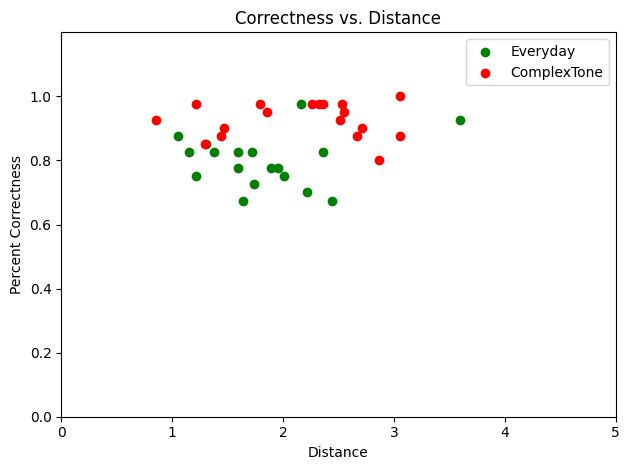

In [20]:
plot_distances1(filtered_df_everyday, filtered_df_complexTone1)

#### Cat Meows vs Complex Tones

In [21]:
# Cat Meows
# distance metric
distanceCM= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_catMeow.csv"
# cat meows
catmeowCorrectness = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9.5 Similarity in SD task - Same/Cat_CompexTone_result/correctness_other.csv"

# Reading the CSV files
distance_df = pd.read_csv(distanceCM)
correctness_df = pd.read_csv(catmeowCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    #switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances2(sequence_names, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        #'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_cat = pd.DataFrame(results)
#print(results_df_everyday)
# Filter out the rows where distance is -1
filtered_df_cat = results_df_cat[(results_df_cat['Distance'] != -1)]
print(filtered_df_cat)

                                             Sequence  Correctness  Distance
0   18_500ms-changeduration_Stretch__0_3, 1_500ms-...     0.926829  1.559259
1   18_500ms-changeduration_Stretch__0_3, 24_500ms...     0.926829  2.710256
2   18_500ms-changeduration_Stretch__0_3, 26_500ms...     0.853659  2.650794
3   18_500ms-changeduration_Stretch__0_3, 2_500ms-...     0.853659  1.969318
4   1_500ms-changeduration_Stretch__0_3, 11_500ms-...     0.951220  2.209524
5   1_500ms-changeduration_Stretch__0_3, 25_500ms-...     0.804878  2.913753
6   1_500ms-changeduration_Stretch__0_3, 8_500ms-c...     0.902439  2.837121
7   1_500ms-changeduration_Stretch__0_3, 8_500ms-c...     0.853659  2.257576
8   24_500ms-changeduration_Stretch__0_3, 18_500ms...     0.853659  1.924537
9   24_500ms-changeduration_Stretch__0_3, 8_500ms-...     0.829268  3.094872
10  25_500ms-changeduration_Stretch__0_3, 2_500ms-...     0.902439  1.771044
11  26_500ms-changeduration_Stretch__0_3, 17_500ms...     0.926829  2.823232

In [22]:
# Complex Tones
# distance metric
distanceCT= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_complexTone2.csv"
# complex tone
complexToneCorrectness = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/9.5 Similarity in SD task - Same/Cat_CompexTone_result/correctness_complexTone.csv'

# Reading the CSV files
distance_df = pd.read_csv(distanceCT)
correctness_df = pd.read_csv(complexToneCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    #switch_name = row['Stim_Ind']
    percent_correctness = row['Percent_Correctness']

    distance = calculate_distances(sequence_names, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        #'Switch': switch_name,
        'Correctness': percent_correctness,
        'Distance': 6 - distance,
    })

results_df_complexTone = pd.DataFrame(results)
filtered_df_complexTone2 = results_df_complexTone[(results_df_complexTone['Distance'] != -1)]
print(filtered_df_complexTone2)

                         Sequence  Correctness  Distance
0   A#4_Bb4, F4, F#4_Gb4, G#4_Ab4     0.951220  3.252137
1        A4, D#5_Eb5, G#4_Ab4, C4     0.902439  1.750291
2                  B4, E4, A4, D5     0.878049  2.263095
3   C#4_Db4, A#4_Bb4, F4, G#4_Ab4     0.951220  2.481766
4        C#4_Db4, B4, A#4_Bb4, C5     0.878049  2.552020
5        C#5_Db5, C4, D#4_Eb4, D4     0.975610  2.695157
6             C5, B4, C4, C#4_Db4     0.878049  3.112821
7                  C5, C4, B4, F4     0.926829  1.629630
8             C5, E4, D4, C#5_Db5     0.926829  1.963131
9   D#5_Eb5, C5, C#4_Db4, A#4_Bb4     0.853659  1.782407
10       D#5_Eb5, G#4_Ab4, C5, B4     0.975610  2.896659
11       D4, F#4_Gb4, A#4_Bb4, F4     0.975610  2.669597
12                 D5, D4, F4, B4     0.975610  2.300000
13  F#4_Gb4, A#4_Bb4, G#4_Ab4, G4     0.951220  3.357576
14            F#4_Gb4, B4, D5, D4     0.926829  1.741414
15       F#4_Gb4, C4, A#4_Bb4, D4     0.829268  1.367725
16            F#4_Gb4, D4, C4, 

#### correlation analysis 

In [23]:
filtered_df_cat.name = 'filtered_df_cat'
filtered_df_complexTone2.name = 'filtered_df_complexTone'
calculate_and_print_correlation(filtered_df_cat, 'Distance')
calculate_and_print_correlation(filtered_df_complexTone2, 'Distance')

# For combined data
combined_df_mean = pd.concat([filtered_df_cat[['Distance', 'Correctness']], 
                              filtered_df_complexTone2[['Distance', 'Correctness']]])
combined_df_mean.name = 'combined_df'
calculate_and_print_correlation(combined_df_mean, 'Distance')


r (cat - Distance): 0.085, t-value: 0.341, p-value: 0.737, dof: 16
r (complexTone - Distance): 0.423, t-value: 1.868, p-value: 0.080, dof: 16
r (df - Distance): 0.217, t-value: 1.296, p-value: 0.204, dof: 34


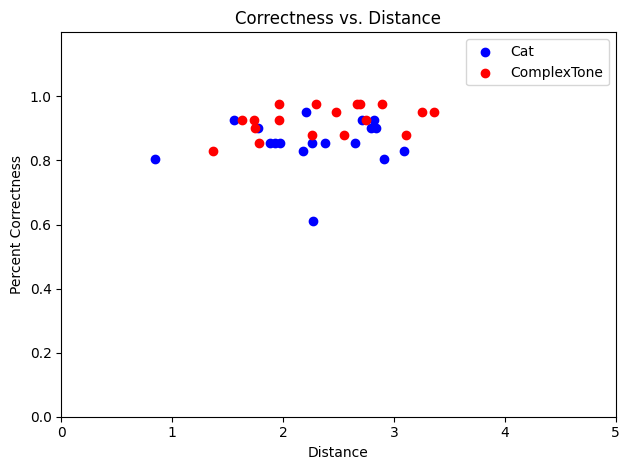

In [24]:
plot_distances2(filtered_df_cat, filtered_df_complexTone2)

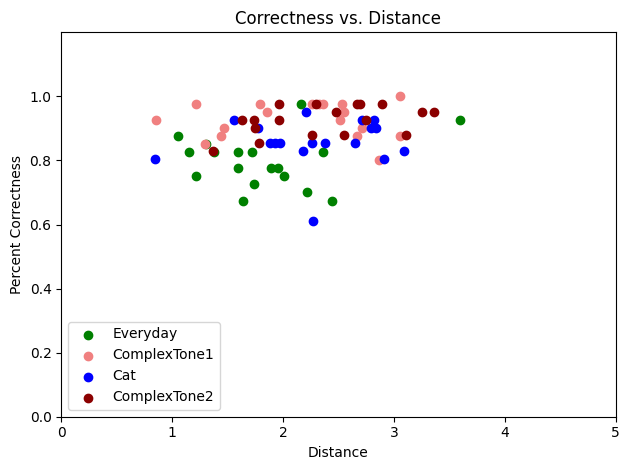

In [25]:
plot_distances_combined(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

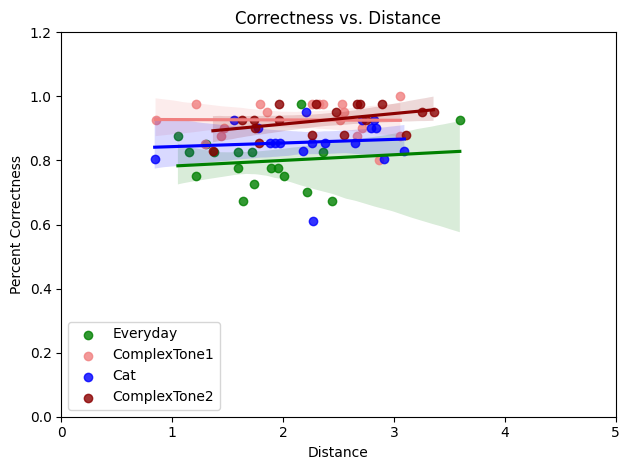

In [26]:
plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

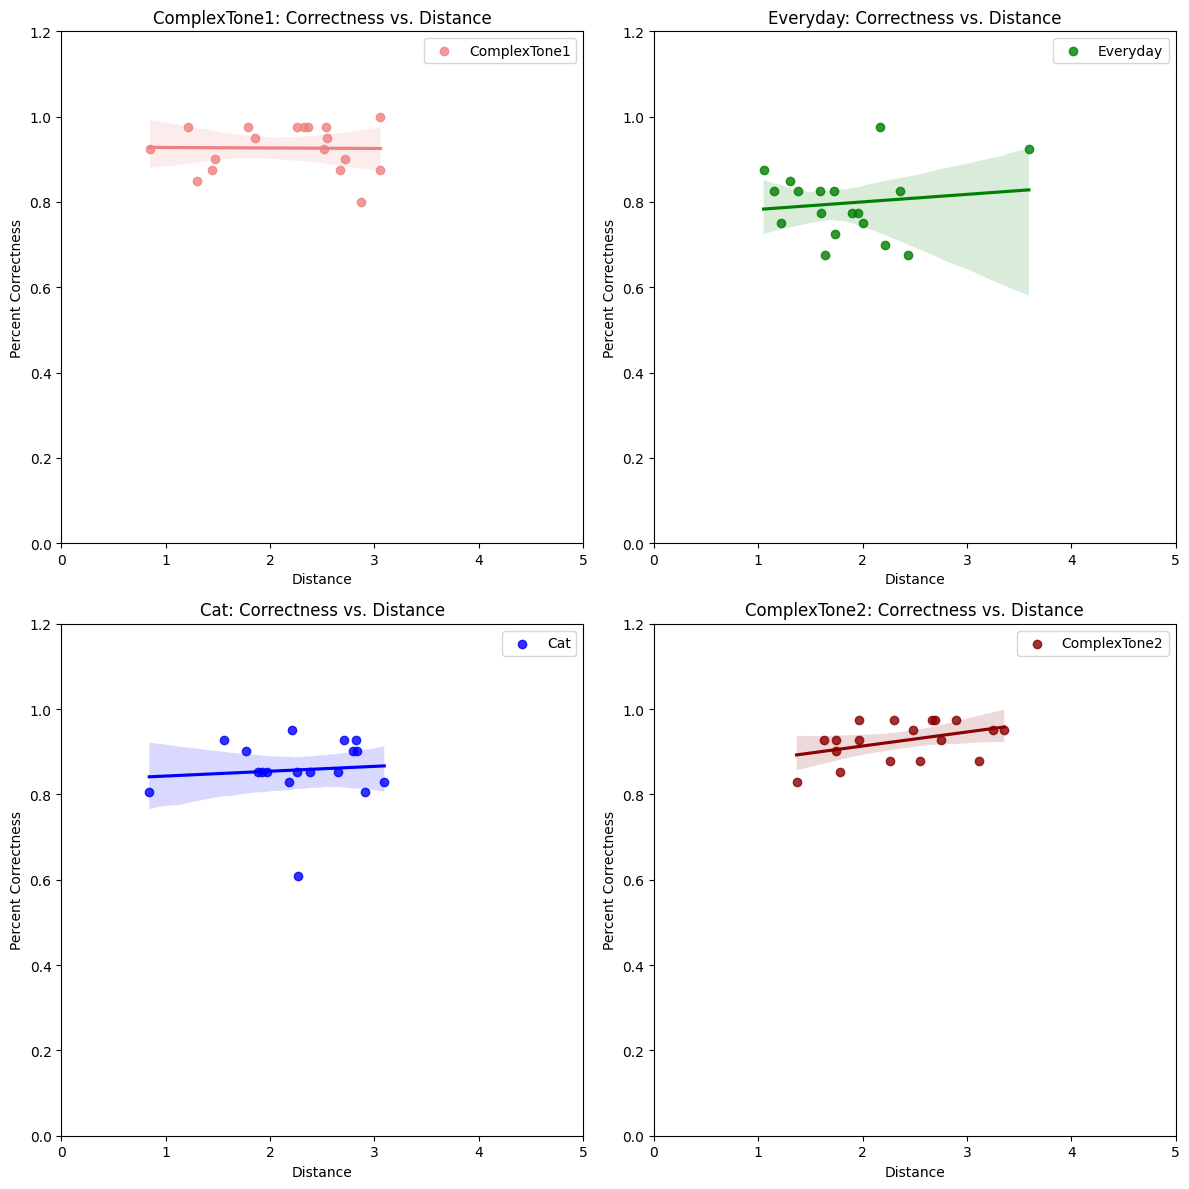

In [27]:
plot_distances_2x2_subplots(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

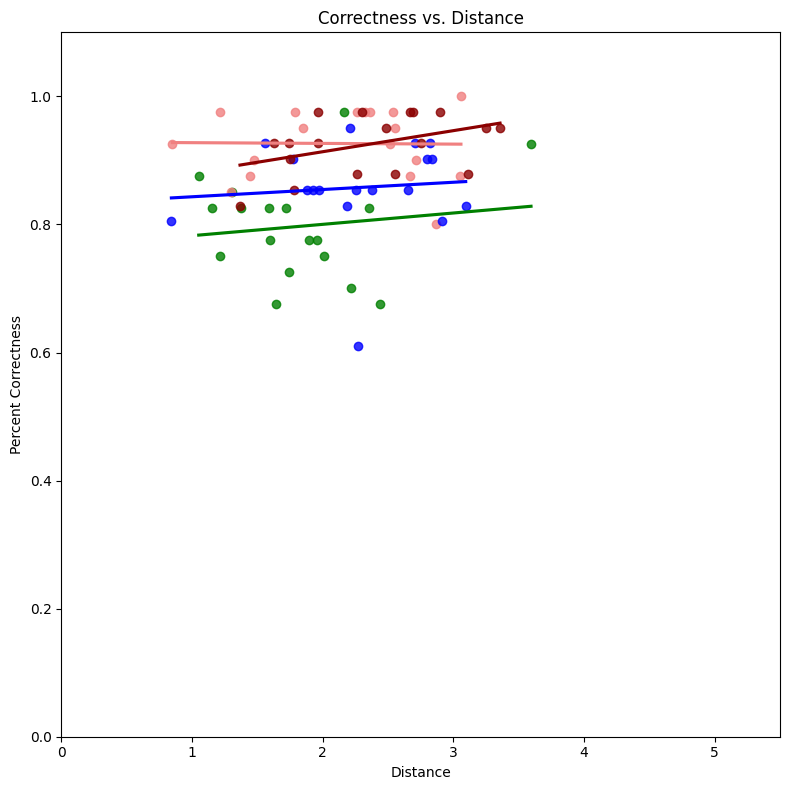

In [28]:
modified_plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)